* By: Valeriia Pervushyna
* Email: v.pervushyna@gmail.com
* References:  **Tim Leung and Xin Li** - *Optimal Mean reversion Trading: Mathematical Analysis and Practical Applications (2015)*

## Abstract

An Ornstein-Uhlenbeck process is a great tool for modeling the behavior of mean-reverting portfolio prices. Tim Leung, Xin Li in "Optimal Mean reversion Trading: Mathematical Analysis and Practical Applications" (2015) present the solution to the optimal timing problems for entering and liquidating the position and the method of creating an optimal mean-reverting portfolio of two assets based on the Ornstein-Uhlenbeck model. Their findings also provide optimal solutions with respect to the stop-loss level if they are provided as an extension of a base problem.


The following implementations and descriptions closely follow the work of Tim Leung: [Tim Leung and Xin Li Optimal Mean reversion Trading: Mathematical Analysis and Practical Applications](https://www.amazon.com/Optimal-Mean-Reversion-Trading-Mathematical/dp/9814725919). Assets used to showcase the module were chosen based on the example in the publication.

## Mean-reverting portfolio

To create a mean-reverting portfolio we *hold* $\alpha = \frac{A}{S_0^{(1)}}$ of a risky asset $S^{(1)}$ and *short* $\beta = \frac{B}{S_0^{(2)}}$, yielding a portfolio value:
$$X_t^{\alpha,\beta} = \alpha S^{(1)} - \beta S^{(2)}, t \geq 0$$
Both assets chosen should be correlated or co-moving. Since in terms of mean-reversion we care only about the ratio between $\alpha$ and $\beta$, without the loss of generality we can set $\alpha=const$ and A =  1 (that represents the amount of investment), while varying $\beta$ to find the optimal strategy $(\alpha,\beta^*)$



In [1]:
from IPython.display import Image

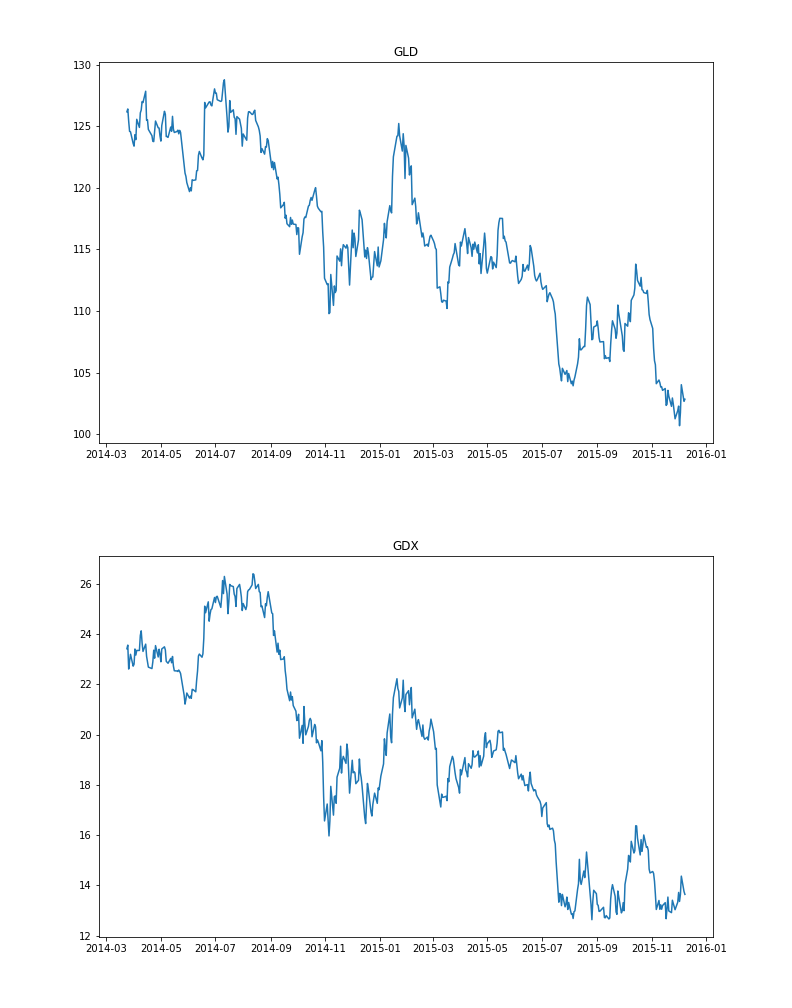

In [2]:
Image(filename='images/GLD_GDX.png')

_Historical price paths of gold (GLD) and VanEck Vectors Gold Miners ETF (GDX). An example of assets that can be used for mean-reverting portfolio creation._

## Ornstein-Uhlenbeck process

We establish Ornstein-Uhlenbeck process driven by the SDE:
$$dX_t = \mu(\theta - X_t)dt + \sigma dB_t,$$
$$\mu, \sigma > 0,$$
$$\theta \in \mathbb{R},$$
$$B\ -\text{a standard Brownian motion}$$



Where:
* $\theta$ − long term mean level, all future trajectories of 𝑋 will evolve around a mean level 𝜃 in the long run.

* $\mu$ - speed of reversion, characterizes the velocity at which such trajectories will regroup around $\theta$ in time.

* $\sigma$ - instantaneous volatility, measures instant by instant the amplitude of randomness entering the system. Higher values imply more randomness.


## Model fitting

To fit the OU model to the portfolio and also find the optimal $\beta^*$ we also have to use the probability density function of $X_t$ with increment  $\delta t = t_i - t_{i-1}$ :


$$f^{OU} (x_i|x_{i-1};\theta,\mu,\sigma) = \frac{1}{\sqrt{2\pi\tilde{\sigma}^2}}exp(-\frac{(x_i - x_{i-1} e^{-\mu\Delta t} - \theta (1 - e^{-\mu \Delta t})^2)} {2 \tilde{\sigma}^2})$$



$$\text{with the constant } \tilde{\sigma}^2 = \sigma^2 \frac{1 - e^{-2\mu\Delta t}}{2\mu}$$

We observe the resulting portfolio values $(x_i^\beta)_{i = 0,1,\cdots,n}$ for every strategy $\beta$
realized over an *n*-day period. To fit the model to our data and find optimal parameters we define the average log-likelihood function:

$$\ell (\theta,\mu,\sigma|x_0^{\alpha\beta},x_1^{\alpha\beta},\cdots,x_n^{\alpha\beta}) := \frac{1}{n}\sum_{i=1}^{n} ln f^{OU}(x_i|x_{i-1};\theta,\mu,\sigma)$$

$$= -\frac{1}{2} ln(2 \pi) - ln(\tilde{\sigma}) - \frac{1}{2\pi\tilde{\sigma}^2}\sum_{i=1}^{n} [x_i^{\alpha\beta} - x_{i-1}^{\alpha\beta} e^{-\mu \Delta t} - \theta (1 - e^{-\mu \Delta t})]^2$$

Maximizing the log-likelihood function by applying maximum likelihood estimation(MLE) we are able to determine
the parameters of the model and fit the observed portfolio prices to an OU process. Let's denote the maximized average
log-likelihood by $\hat{\ell}(\theta^*,\mu^*,\sigma^*)$. Then for every $\alpha$ we choose
$\beta^*$, where:

$$\beta^* = \underset{\beta}{\arg\max}\ \hat{\ell}(\theta^*,\mu^*,\sigma^*|x_0^{\alpha\beta},x_1^{\alpha\beta},\cdots,x_n^{\alpha\beta})$$

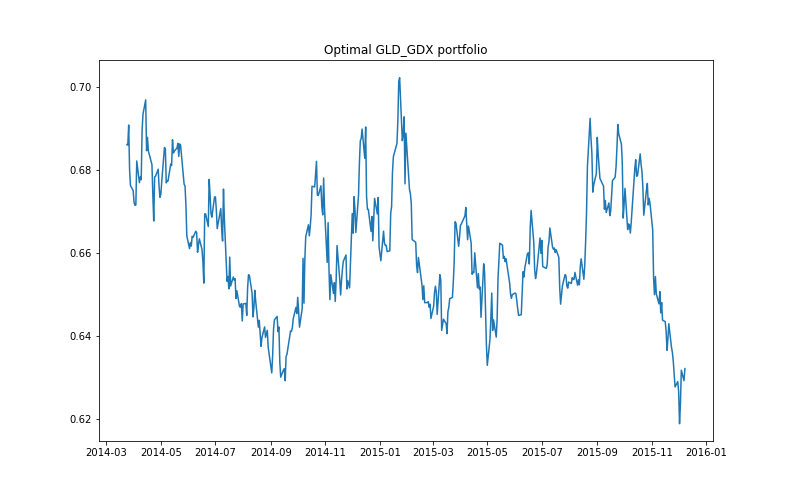

In [3]:
Image(filename='images/Optimal_mean_reverting_portfolio.png')

_An optimal mean-reverting portfolio constructed with GLD and GDX assets using the average log-likelihood method._

## Optimal stopping problems

Let's establish an optimal stopping problem. Suppose the investor already has a position with a **value process** $(X_t)_{t>0}$ that follows the OU process. When the investor closes his position at the time $\tau$ he receives the value $(X_{\tau})$ and pays a **constant transaction cost** $c_s \in \mathbb{R}$ Our goal is to maximize the expected discounted value, where $r > 0$ is the **subjective discount rate of liquidation**. To achieve that we need to solve the optimal stopping problem:

$$V(x) = \underset{\tau \in T}{\sup} \mathbb{E}_x{e^{-r \tau} (X_{\tau} - c_s)| X_0 = x}$$

$V(x)$ represents the expected liquidation value accounted with X.

Current price plus transaction cost constitute the cost of entering the trade and in combination with $V(x)$ we can formalize the optimal entry problem:

$$J(x) = \underset{\nu \in T}{\sup} \mathbb{E}_x{e^{-\hat{r} \tau} (V(X_{\nu}) - X_{\nu} - c_b)| X_0 = x}$$

$$r,\hat{r}>0 \text{ - discount rates}$$

$$c_s,c_b \in \mathbb{R} \text{ - transaction costs}$$



### The analytical solution to the optimal stopping problems:

We denote the OU process infinitesimal generator:

$$L = \frac{\sigma^2}{2} \frac{d^2}{dx^2} + \mu(\theta - x) \frac{d}{dx}$$

and recall the classical solution of the differential equation

$$L u(x) = ru(x)$$


$$F(x) = \int_{0}^{\infty} u^{ \frac{r}{\mu} - 1} e^{\sqrt{\frac{2\mu}{\sigma^2}}(x - \theta)u - \frac{u^2}{2}}du$$


$$G(x) = \int_{0}^{\infty} u^{\frac{r}{\mu} - 1} e^{\sqrt{\frac{2\mu}{\sigma^2}} (\theta - x)u - \frac{u^2}{2}}du$$


#### The analytical solutions can be divided into two parts:

* The default solutions

    **Theorem 2.6 (p.23).**
    The *optimal liquidation problem* admits the solution:

    $$ V(x) = \begin{cases} (b^* - c_s) \frac{F(x)}{F(b^*)} , & \mbox{if } x \in (-\infty,b^*) \\ x - c_s, &  \mbox{ otherwise}  \end{cases}$$

    The optimal liquidation level $b^*$ is found from the equation:

    $$F(b) - (b - c_s)F'(b) = 0$$

    **Theorem 2.10 (p.27).**
    The *optimal entry timing problem* admits the solution:

    $$ J(x) = \begin{cases} V(x) - x - c_b, & \mbox{if } x \in (-\infty,d^*)\\ \frac{V(d^*) - d^* - c_b}{\hat{G}(d^*)}, & \mbox{if } x \in (d^*, \infty)  \end{cases}$$

    The optimal entry level $d^*$ is found from the equation:

    $$\hat{G}(d)(V'(d) - 1) - \hat{G}'(d)(V(d) - d - c_b) = 0$$




* The solutions with the inclusion of stop-loss

    **Theorem 2.13 (p.31):**
    The *optimal liquidation problem with respect to stop-loss level* admits the solution:

    $$V(x) = \begin{cases} C F(x)+D G(x) , & \mbox{if } x \in (-\infty,b^*)\\ x - c_s, & \mbox{ otherwise}  \end{cases}$$

    The **optimal liquidation level** $b_L^*$ is found from the equation:

    $$F'(b) [(L - c_s) G(b) - (b - c_s) G(L)] + G'(b) [(b - c_s) F(L) - (L - c_s) F(b)] - G(b) F(L) - G(L)F(b) = 0$$

    Helper functions C and D defined as following:

    $$C = \frac{(b_L^* - c_s) G(L) - ( L - c_s) G(b^*)}{F(b_L^*)G(L) - F(L)G(b_L^*)}$$

    $$D = \frac{(L - c_s) F(L) - ( b_L^* - c_s) F(b^*)}{F(b_L^*)G(L) - F(L)G(b_L^*)}$$

    **Theorem 2.42 (p.35):**
    The *optimal entry timing problem with respect to stop-loss level* admits the solution:

    $$J_L(x) = \begin{cases} P\hat{F}(x),  & \mbox{if } x \in (-\infty,a_L^*)\\ V_L(x) - x - c_b, & \mbox{if } x \in (a_L^*, d_L^*)\\  Q\hat{G}(x), & \mbox{if } x \in (d_L^*, \infty)\end{cases}$$

    The **optimal entry interval** $(a_L^*,d_L^*)$ is found using the respective equations:

    $$\hat{G}(d)(V_L'(d) - 1) - \hat{G}'(d)(V_L(d) - d - c_b) = 0$$

    $$\hat{F}(a)(V_L'(a) - 1) - \hat{F}'(a)(V_L(a) - a - c_b) = 0$$



## How to use the OU module

This module gives the ability to calculate optimal values for entering and liquidating the position for your portfolio. 

**Note:** It is important that the model returns the *single* best pair of one-time entry/liquidation values. 

Our main incentive in using this model is fairly simple:

* If not already entered, enter when the price reaches optimal entry level.

* If not already liquidated, liquidate when the price reaches optimal liquidation level.

In the case of the optimal timing solutions with the inclusion of the stop-loss level, the level of entry becomes the first bound of the entry interval to be reached by the portfolio price.

This module also can be used on already constructed mean-reverting portfolios by providing the one-dimensional array or dataframe as input data.

In [4]:
import mlfinlab.optimal_mean_reversion as omr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

### Data preparation:

To showcase the module functionality we will use GLD and GDX data from Yahoo Finance:

In [5]:
# Import data from Yahoo finance
data1 =  yf.download("GLD GDX", start="2012-03-25", end="2013-12-09")
data2 =  yf.download("GLD GDX", start="2015-12-10", end="2016-02-20")
data3 =  yf.download("GLD GDX", start="2016-02-21", end="2020-08-20")

data1.head()

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
                  GDX         GLD        GDX         GLD        GDX   
Date                                                                  
2012-03-26  47.777840  164.399994  50.630001  164.399994  50.950001   
2012-03-27  47.098400  163.240005  49.910000  163.240005  50.860001   
2012-03-28  46.173607  161.509995  48.930000  161.509995  49.750000   
2012-03-29  46.296288  161.279999  49.060001  161.279999  49.090000   
2012-03-30  46.749245  162.119995  49.540001  162.119995  49.630001   

                              Low                   Open              \
                   GLD        GDX         GLD        GDX         GLD   
Date                                                                   
2012-03-26  164.539993  50.200001  162.949997  50.810001  163.169998   
2012-03-27  164.889999  49.799999  163.130005  50.840000  164.520004   
2012-03-28  162.979996  48.630001  160.660004  49.650002  162.710007   
2012-03-29  161.460007  48.049999  159.809998  48.759998  161.139999   
2012-03-30  162.330002  48.810001  161.220001  49.619999  161.669998   

              Volume            
                 GDX       GLD  
Date                            
2012-03-26  12638700  13226700  
2012-03-27  10166200  10908700  
2012-03-28  14557900  11008200  
2012-03-29  12259600  11026900  
2012-03-30   9890400   7534000

To build the optimal portfolio, first we create a *pd.DataFrame* or a *np.array* of two asset prices that we are using.  In the following cell we separate the data into 3 types of arrays for *initial training*, *testing and retraining the model* and *testing the retrained model*.

In [6]:
# You can use the pd.DataFrame of two asset prices
data_train_dataframe = data1["Adj Close"][["GLD", "GDX"]]

# And also we can create training dataset as an array of two asset prices
data_train = np.array(data1["Adj Close"][["GLD", "GDX"]])

# Create an out-of-sample dataset
data_test_and_retrain = data2["Adj Close"][["GLD", "GDX"]]

data_test_the_retrained = np.array(data3["Adj Close"][["GLD", "GDX"]])

data_train.shape

(429, 2)

**NOTE:** It is important which one of your assets you decide to long and which you decide to short since the outcome of the model and existence of the solution depend on that. Therefore, we have to be mindful of the order of asset prices in our array or dataframe used for training. The one that you intend to long has to be put first, and the one you are shorting - second.

In [7]:
# We are longing the GLD and shorting the GDX
data_train_dataframe.head()

,GLD,GDX
Date,,
2012-03-26,164.399994,47.777840
2012-03-27,163.240005,47.098400
2012-03-28,161.509995,46.173607
2012-03-29,161.279999,46.296288
2012-03-30,162.119995,46.749245


Logically we can divide the module usage proces into four steps: 
* model fitting
* optimal levels calculation
* showcasing the result
* model retraining

### Step 1: Data training

First of all, we use a `fit` function to find the optimal ratio between the assets for our portfolio to achieve maximum mean reversion and then fit the OU model to our optimal portfolio. During this step, we also set the discount ratios, transaction costs for entering/exiting the position and data frequency. Adding the stop loss level is optional and can be added or changed along the way.

In [8]:
# Set up a class object
example = omr.OrnsteinUhlenbeck()

After that we fit the model to the training data and allocate data frequency,
transaction costs, discount rates and stop-loss level

You can use the *np.array* as an input data: 

In [9]:
# You can input the np.array as data 
example.fit(data_train, data_frequency="D", discount_rate=[0.05, 0.05],
            transaction_cost=[0.02, 0.02], stop_loss=0.2)

# The parameters can be allocated in an alternative way
example.fit(data_train_dataframe, data_frequency="D", discount_rate=0.05,
            transaction_cost=0.02, stop_loss=0.2)

You also can use the *pd.DataFrame* as an input data: 

In [10]:
# Chosen data type can be pd.DataFrame
example.fit(data_train_dataframe, data_frequency="D", discount_rate=[0.05, 0.05],
            transaction_cost=[0.02, 0.02], stop_loss=0.2)

# In this case we can also specify the interval we want to use for training
example.fit(data_train_dataframe, data_frequency="D", discount_rate=[0.05, 0.05],
            start="2012-03-27", end="2013-12-08",
            transaction_cost=[0.02, 0.02], stop_loss=0.2)

Stop-loss level, transaction costs and discount rates
can be changed along the way

In [11]:
example.L = 0.3

The crucial point is to understand how well is your input data represented by the fitted model. Is it suitable to fit an OU process to it?

To check we are using the `check_fit` function. The main incentive is to have simulated *max log-likelihood* (mll) function close to a fitted one. If the simulated mll is much greater it means that data provided to the model is not good enough to be modeled by an OU process. 

The check can occasionally return numbers significantly different from the fitted mll due to the random nature of the simulated process and the possibility of outliers. We advise to perform the check multiple times and if it's consistently showing very different values of *mll* you might suspect the unsuitability of your data.

In [12]:
example.check_fit()

,Theta,Mu,Sigma,Average log-likelihood
empirical,0.567511,9.417361,0.105215,3.616095
simulated,0.581296,16.161667,0.106008,3.595575


Our data passes the fitness check since the difference between mll's is relatively small.

### Step 2: Optimal levels calculation

If you need to calculate the optimal levels separately to use for your trading strategy you should call the function for the respective optimal level.

In [13]:
# To calculate the optimal entry of liquidation levels separately
# you need to use following functions


# Calculate the optimal liquidation level
b = example.optimal_entry_level()

# Calculate the optimal entry level
d = example.optimal_entry_level()

# Calculate the optimal liquidation level accounting for stop-loss
b_L = example.optimal_liquidation_level_stop_loss()

# Calculate the optimal entry interval accounting for stop-loss
interval_L = example.optimal_entry_interval_stop_loss()

In [14]:
print("b*=",np.round(b, 4),"\nd*=",np.round(d, 4),"\nb_L*=",np.round(b_L, 4),"\n[a_L*,d_L*]=",np.round(interval_L, 4))

b*= 0.4997 
d*= 0.4997 
b_L*= 0.6054 
[a_L*,d_L*]= [0.3108 0.4997]


### Step 3: Showcasing the results

To showcase all the parameters of the fitted model and found optimal levels we use the `description` function.

If the stop-loss level is not set all the functions that are using it will not be calculated.

In [15]:
# Setting the stop-loss level to "None"
example.L = None

# Call the description function to see all the model's parameters and optimal levels
example.description()

training period              [2012-03-27, 2013-12-08]
long-term mean                               0.567511
speed of reversion                            9.41736
volatility                                   0.105215
fitting error                               0.0342279
discount rates                           [0.05, 0.05]
transaction costs                        [0.02, 0.02]
stop-loss level                                  None
beta                                            0.445
optimal entry level                          0.499737
optimal liquidation level                    0.605351
dtype: object

We deleted our stop-loss level in the previous cell, lets set it back to showcase the how the description function works wth the stop-loss.

In [16]:
# Setting the stop-loss level back to previous value
example.L = 0.3

# Call the description function to see all the model's parameters and optimal levels
example.description()

training period                   [2012-03-27, 2013-12-08]
long-term mean                                    0.567511
speed of reversion                                 9.41736
volatility                                        0.105215
fitting error                                    0.0260842
discount rates                                [0.05, 0.05]
transaction costs                             [0.02, 0.02]
stop-loss level                                        0.3
beta                                                 0.445
optimal entry level                               0.499737
optimal liquidation level                         0.605351
optimal entry interval [sl]             [0.31083, 0.49974]
optimal liquidation level [sl]                    0.605351
dtype: object

We can also showcase our results on any data we choose by calling the `plot_levels` function. When provided an np.array or pd.DataFrame for two asset prices it uses the previously found optimal coefficient to create a portfolio out of them and plots it and the found optimal levels.


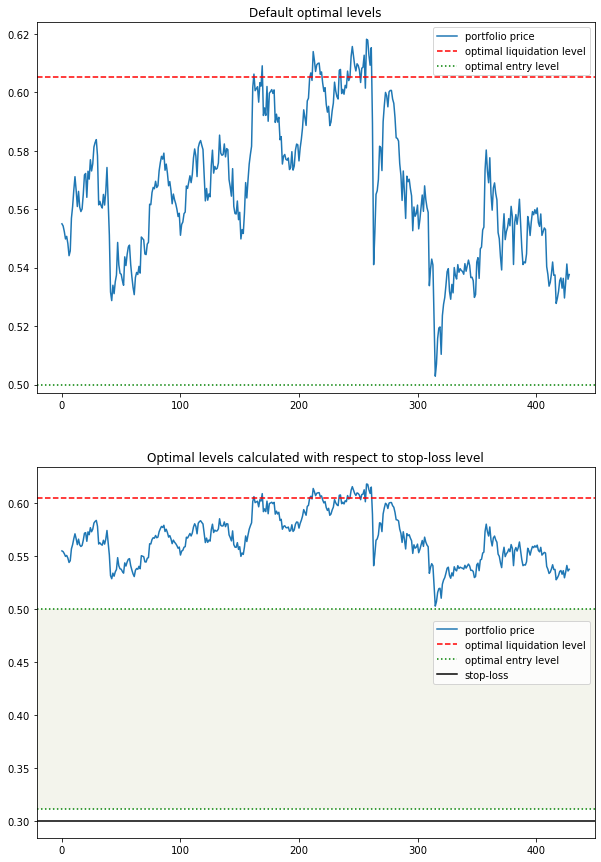

In [17]:
# Showcasing the results on the training data (pd.DataFrame)
fig = example.plot_levels(data=data_train_dataframe, stop_loss=True)
fig.set_figheight(15)
fig.set_figwidth(10)

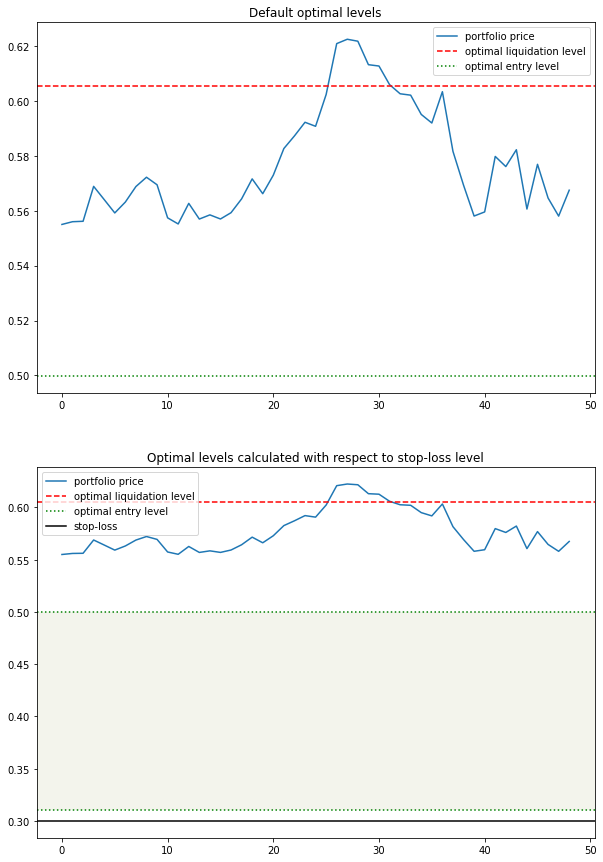

In [18]:
# Showcasing the results on the test data (np.array)
fig = example.plot_levels(data=data_test_and_retrain, stop_loss=True)
fig.set_figheight(15)
fig.set_figwidth(10)

During the first test period none of the optimal levels are reached yet.

### Step 4: Retraining the model

The next possiple step to take is to retrain the model.For that we are using `fit_to_assets` or `fit_to_data` depending on the input data.  
As input, you can either use new data or if you used pd.DataFrame during the fitting process, you can retrain the model on a different time interval of your already provided data.


In [19]:
# Retrain the model on the different training interval from already provided data
example.fit_to_assets(start="2012-05-27", end="2013-05-08")

# Showcase the results of retraining on the different training period of already provided data:
example.L = None
example.description()

training period              [2012-05-27, 2013-05-08]
long-term mean                               0.671916
speed of reversion                            15.3723
volatility                                    0.11212
fitting error                               0.0266124
discount rates                           [0.05, 0.05]
transaction costs                        [0.02, 0.02]
stop-loss level                                  None
beta                                         0.384455
optimal entry level                           0.61182
optimal liquidation level                    0.705157
dtype: object

Lets use a new training data:

In [20]:
# Retrain the model on new data
example.fit_to_assets(data=data_test_and_retrain)

# Showcase the results of retraining on the new data:
example.L = 0.5
example.description()

training period                   [2015-12-09 00:00:00, 2016-02-19 00:00:00]
long-term mean                                                       0.76268
speed of reversion                                                   10.7709
volatility                                                          0.101458
fitting error                                                     -0.0290145
discount rates                                                  [0.05, 0.05]
transaction costs                                               [0.02, 0.02]
stop-loss level                                                          0.5
beta                                                                0.293636
optimal entry level                                                 0.699028
optimal liquidation level                                           0.793363
optimal entry interval [sl]                                [0.5092, 0.69903]
optimal liquidation level [sl]                                      0.793363

And now plotting our results on the data from the `data_test_retrained` dataset.

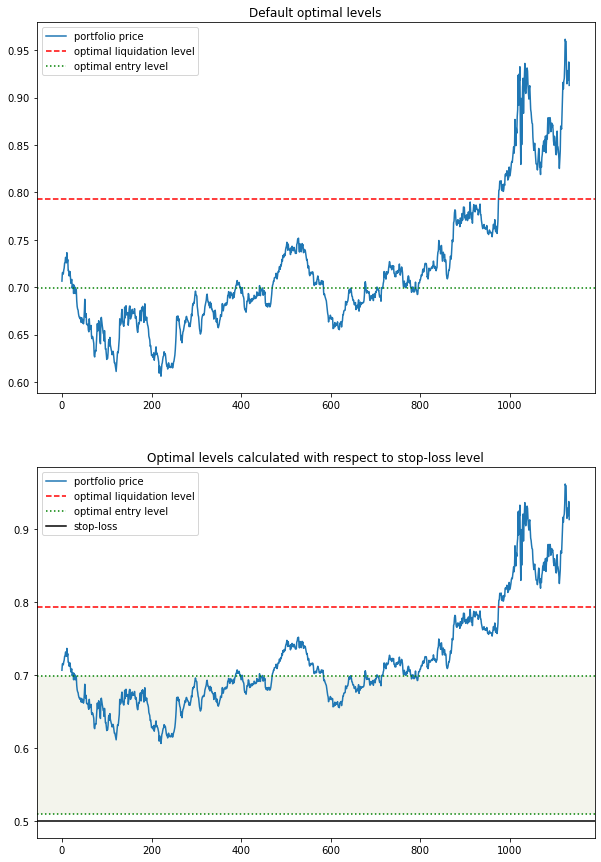

In [21]:
fig = example.plot_levels(data_test_the_retrained, stop_loss=True)
fig.set_figheight(15)
fig.set_figwidth(10)

Here we can see that both optimal entry and exit levels are reached at some point of time during this observation period. After that moment it is advised to retrain the model and continue the process.

### Additional functionality

**Half-life**

Since the half-life parameter of the OU model is widely used in researches we also implemented the function that calculates it. 

*Half-life represents the average time that it takes for the process to revert to it's long term mean on a half of its initial deviation.*


In [22]:
example.half_life()

0.06435368943471989

**Generating synthetic mean-reverting data**

We can also use `ou_model_simulation` to generate synthetic data to test our model on or for other purposes. The function uses the parameter values of previously fitted model by default but it can be used with your own OU model paramenters. 

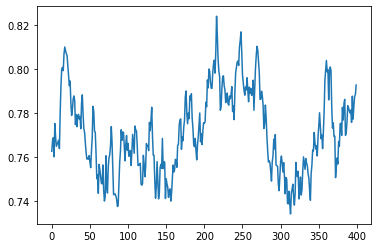

In [23]:
# Syntetic data generated with fitted model parameters
ou_fitted = example.ou_model_simulation(n=400)

plt.plot(ou_fitted)

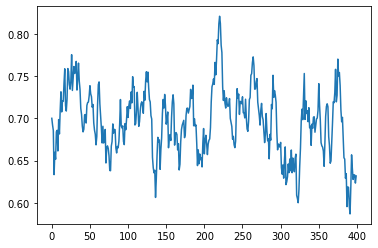

In [24]:
# Presuming we are using daily data
delta_t = 1/252
# Syntetic data generated with given model parameters
ou_given = example.ou_model_simulation(n=400, theta_given=0.7, mu_given=21,
                                       sigma_given=0.3, delta_t_given=delta_t)

plt.plot(ou_given)

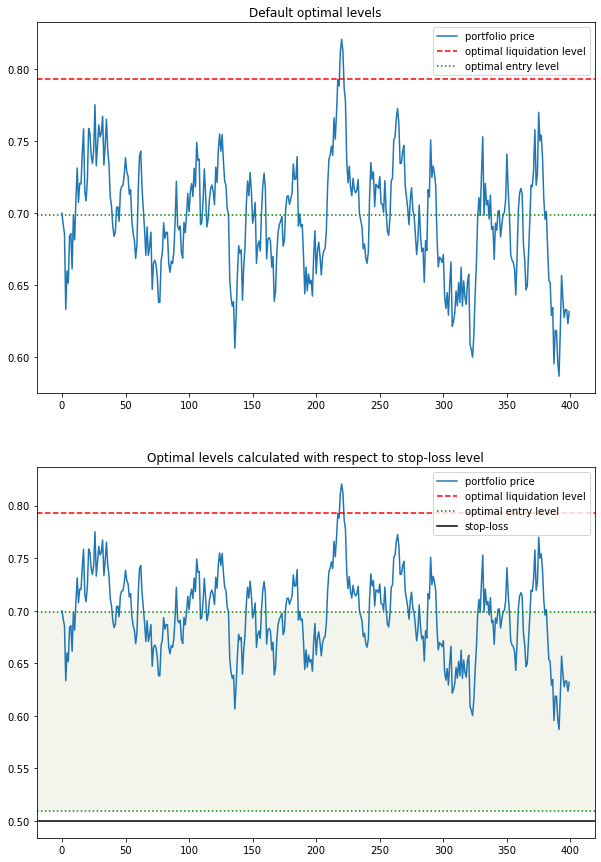

In [25]:
# You can plot the previously found optimal levels on generated data

fig = example.plot_levels(ou_given, stop_loss=True)
fig.set_figheight(15)
fig.set_figwidth(10)

As an another application you can train and test the model on the simulated data.

In [26]:
# Creating the dataset
ou_train_given = example.ou_model_simulation(n=400, theta_given=0.7, mu_given=12,
                                       sigma_given=0.1, delta_t_given=delta_t)

# Training our model on simulated data
example.fit(ou_train_given, data_frequency="D", discount_rate=[0.05, 0.05],
            transaction_cost=[0.02, 0.02], stop_loss=0.55)

# Showcasing the model's details
example.description()

training period                         [None, None]
long-term mean                              0.703891
speed of reversion                           11.6996
volatility                                  0.109652
fitting error                               0.057253
discount rates                          [0.05, 0.05]
transaction costs                       [0.02, 0.02]
stop-loss level                                 0.55
beta                                        0.293636
optimal entry level                         0.638439
optimal liquidation level                   0.738444
optimal entry interval [sl]       [0.56359, 0.63844]
optimal liquidation level [sl]              0.738444
dtype: object

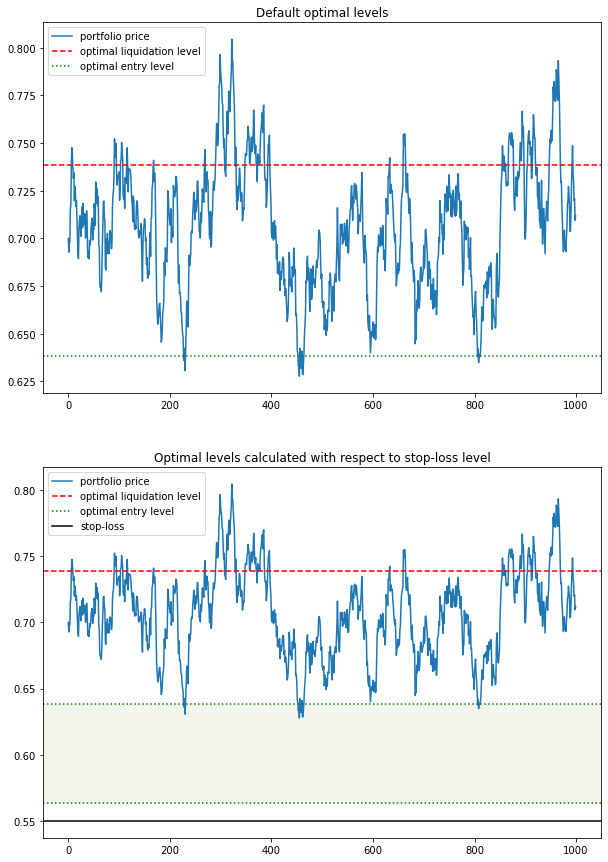

In [27]:
# Creating a testing dataset
ou_test_given = example.ou_model_simulation(n=1000, theta_given=0.7, mu_given=12,
                                            sigma_given=0.15, delta_t_given=delta_t)

# Plotting found optimal levels on a testing dataset
fig = example.plot_levels(ou_test_given, stop_loss=True)
fig.set_figheight(15)
fig.set_figwidth(10)

*“Our model can be considered as the building block for the problem with any finite number of sequential trades”* – Professor Tim Leung and Xin Li, 2015.

## Conclusion

This notebook describes the Ornstein-Uhlenbeck (OU) model and how it is applied to mean reverting portfolios. The main focus was portfolio optimization for pairs trading and the optimal timing of trades.

Both techniques were introduced by *Tim Leung and Xin Li* in [**Optimal Mean reversion Trading: Mathematical Analysis and Practical Applications**](https://www.amazon.com/Optimal-Mean-Reversion-Trading-Mathematical/dp/9814725919)

Key takeaways from the notebook:

* Ornstein-Uhlenbeck model is used to model the behavior of mean-reverting assets.

* Using the OU model we can create an optimal mean-reverting portfolio with a maximum level of mean reversion and the best fit. We achieve both goals using the average loglikelihood function.

* For the OU process, we can formulate an optimal stopping problem that allows us to maximize the expected discounted value of entering or liquidating the position.

* The problem can be solved for the case with a defined stop-loss level or without it.

* The model should be considered as a building block for the problem with any finite number of sequential trades.

* Main idea behind the use of the model is:
    
    * If position is not already entered, enter when the price reaches optimal entry level.

    * If position is not already liquidated, liquidate when the price reaches optimal liquidation level.

* The model is built on a premise of one entry and one exit point during the observation period.





## Reference

1. Leung, Tim, and Xin Li. Optimal Mean Reversion Trading: Mathematical Analysis and Practical Applications. World Scientific Publishing Company, 2451. 